In [1]:
%load_ext autoreload

import time

import struct
import array
import gc

import numpy as np
import matplotlib.pylab as plt

import sys

sys.path.append("../mim_data_utils/src")

from mim_data_utils import DataLogger, DataReader

np.set_printoptions(suppress=True, precision=2)

In [2]:
from scipy.spatial.transform import Rotation

In [3]:
reader = DataReader('latest.mds')
reader.read_data()

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


In [4]:
j = reader.data['joint_positions'][:,1]
v = reader.data['vicon_leg_hr'][:,2]

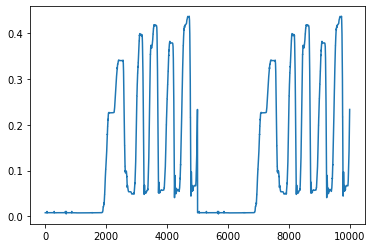

In [26]:
j_scaled = -1*(j)
plt.plot(j_scaled)

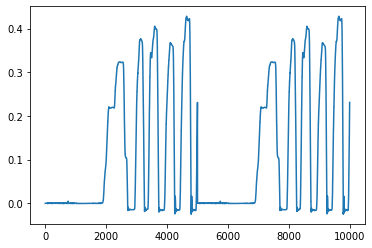

In [6]:
v_scaled = (v-v[0])*np.max(j_scaled)/np.max(v-v[0])
plt.plot(v_scaled)

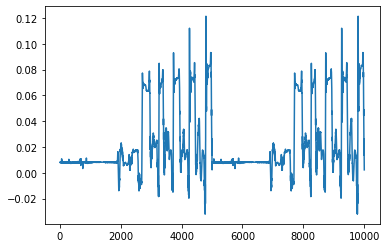

In [27]:
d = j_scaled - v_scaled
plt.plot(d)

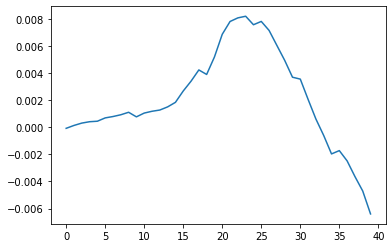

In [8]:
plt.plot(d[1880:1920])

In [9]:
def Q_to_E(a):
    x = a[:, 0]
    y = a[:, 1]
    z = a[:, 2]
    w = a[:, 3]
    ysqr = y * y

    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + ysqr)
    X = np.degrees(np.arctan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    t2 = np.where(t2>+1.0,+1.0,t2)
    #t2 = +1.0 if t2 > +1.0 else t2

    t2 = np.where(t2<-1.0, -1.0, t2)
    #t2 = -1.0 if t2 < -1.0 else t2
    Y = np.degrees(np.arcsin(t2))

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (ysqr + z * z)
    Z = np.degrees(np.arctan2(t3, t4))

    return X, Y, Z 

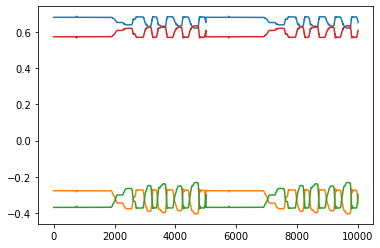

In [10]:
plt.plot(reader.data['vicon_leg_hr'][:,3:7])

In [11]:
E = Q_to_E(reader.data['vicon_leg_hr'][:,3:7])

In [12]:
E[0].shape

(10004,)

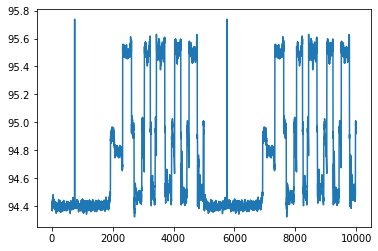

In [13]:
plt.plot(E[0])

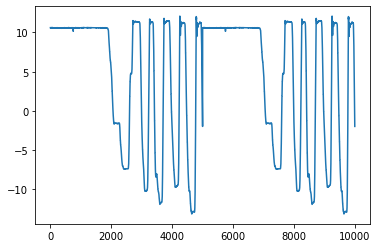

In [14]:
plt.plot(E[1])

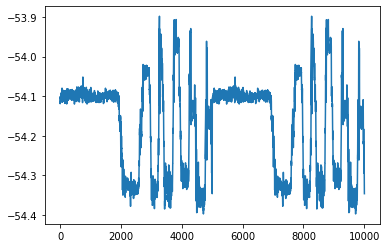

In [15]:
plt.plot(E[2])

In [16]:
Rotation.from_quat((0,0,0,1)).as_euler('xyz')

array([0., 0., 0.])

In [17]:
E = Rotation.from_quat(reader.data['vicon_leg_hr'][:,3:7]).as_euler('xyz')[:,1]

In [28]:
E_all = Rotation.from_quat(reader.data['vicon_leg_hr'][:,3:7]).as_euler('xyz')

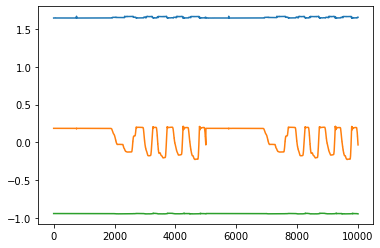

In [32]:
plt.plot(E_all)

In [18]:
Rotation.from_quat(reader.data['vicon_leg_hr'][:,3:7]).as_euler('xyz')[:,1]

array([ 0.19,  0.19,  0.18, ..., -0.02, -0.03, -0.03])

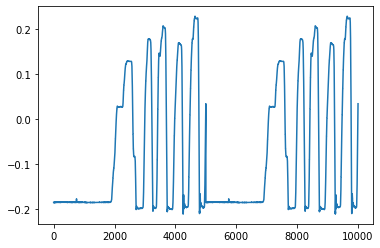

In [33]:
plt.plot(E*-1)

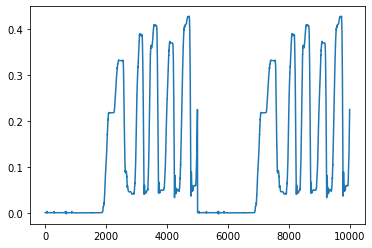

In [20]:
plt.plot(j_scaled)

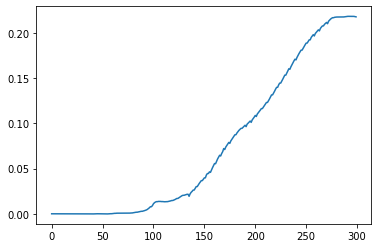

In [21]:
plt.plot(j_scaled[1800:2100])

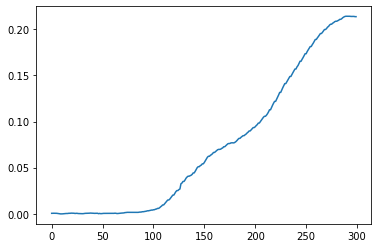

In [22]:
plt.plot((E*-1 + E[0])[1800:2100])

In [23]:
D = (j_scaled-(E*-1 + E[0]))

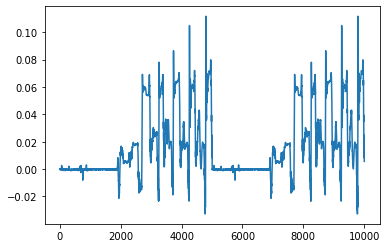

In [24]:
plt.plot(D)

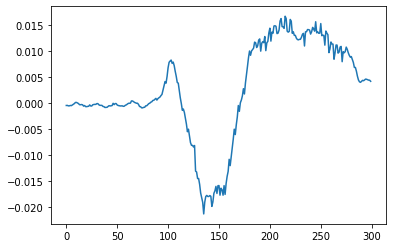

In [25]:
plt.plot(D[1800:2100])